In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from tqdm import tqdm

In [74]:
client = MongoClient('localhost', 27017)
db = client['IAtest']

analisis_predictivos = db['modelos_de_analisis']
data = list(analisis_predictivos.find().limit(10))

In [75]:
acciones_preventivas = [
    "Mantener reposo en cama",
    "Beber líquidos abundantes",
    "Tomar medicamentos para el dolor de cabeza",
    "Consultar a un médico",
    "Realizar ejercicios de respiración profunda",
    "Evitar alimentos grasosos",
    "Aplicar compresas frías en la frente",
    "Monitorear la presión arterial regularmente",
]

In [82]:
# Datos de ejemplo: síntomas, signos vitales y acciones preventivas
# sintomas_list = np.array([[1, 0, 1, 0, 1, 0, 1, 0, 1],
#                      [0, 0, 0, 0, 0, 1, 1, 1, 1],
#                      [0, 1, 0, 1, 0, 1, 0, 1, 0],
#                      [1, 1, 1, 1, 1, 1, 1, 1, 1],
#                      [0, 0, 1, 0, 1, 1, 0, 0, 0]])

# signos_vitales_list = np.array([[37.5, 120, 80, 70, 100, 1.5],
#                    [37.0, 118, 78, 72, 105, 1.6],
#                    [37.3, 122, 82, 68, 95, 1.7],
#                    [36.9, 119, 79, 75, 110, 1.8],
#                    [37.2, 121, 81, 71, 98, 1.9]])

# acciones_preventivas_list = np.array([5.0, 10.0, 15.0, 20.0, 25.0])

sintomas_list = []
signos_vitales_list = []
acciones_preventivas_list = []

for value in tqdm(data, desc="Realizando Analisis", unit="modelo"):
    caracteristica = []
    sintomas = value["sintomas"]
    # print(sintomas)
    caracteristica = [1 if sintoma else 0 for sintoma in sintomas.values()]
    
    signos_vitales = value["signos_vitales"]
    # print(signos_vitales)
    # sintomas_codificados = [ ]
    for signos_vitales in signos_vitales.values():
        caracteristica.append(signos_vitales)
    # print(sintomas_codificados) 
    
    signos_vitales_list.append(caracteristica)
    
    acciones_preventivas_list.append(acciones_preventivas.index(value["accion_preventiva"]))

# sintomas_list = np.array(sintomas_list)
# signos_vitales_list = np.array(signos_vitales_list)
caracteristica = np.array(caracteristica)
acciones_preventivas_list = np.array(acciones_preventivas_list)

Realizando Analisis: 100%|██████████| 1/1 [00:00<?, ?modelo/s]


In [86]:
# print(sintomas_list)
print( len(caracteristica))
# print(acciones_preventivas_list)

15


In [89]:
# Definición del modelo de regresión lineal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[15])  # 15 características de entrada (síntomas)
])

# Compilación del modelo
model.compile(optimizer='Adam', loss='mean_squared_error')
# model.compile(optimizer='sgd', loss='mean_squared_error')


# Entrenamiento del modelo
historial = model.fit(caracteristica, acciones_preventivas_list, epochs=1000)

# Evaluación del modelo
test_loss = model.evaluate(caracteristica, acciones_preventivas_list)
print(f'Error cuadrático medio en datos de entrenamiento: {test_loss}')

ValueError: Unrecognized data type: x=[1, 1, 1, 1, 0, 0, 0, 0, 0, 36, 120, 80, 70, 100, 1.5] (of type <class 'list'>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicciones de acciones preventivas:
Síntomas: [0 1 0 1 0 0 1 1 0], Acción preventiva predicha: [54.702953]


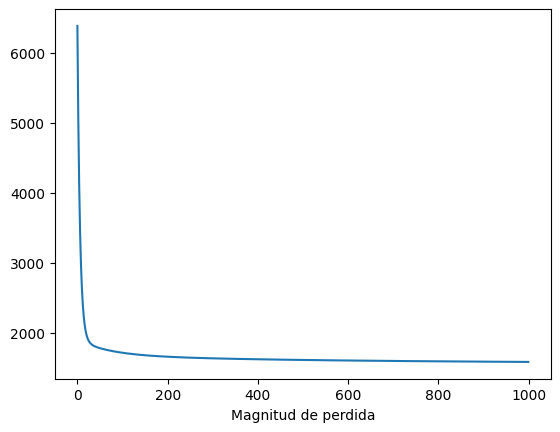

In [55]:
# Hacer predicciones
new_symptoms = np.array([[0,1,0,1,0,0,1,1,0]])
predictions = model.predict(new_symptoms)
print("Predicciones de acciones preventivas:")
for i in range(len(new_symptoms)):
    print(f'Síntomas: {new_symptoms[i]}, Acción preventiva predicha: {predictions[i]}')

# Visualización de los datos y la línea de regresión
# plt.scatter(signos_vitales_list[:, 0], acciones_preventivas_list, color='red', label='Temperatura')
# plt.scatter(signos_vitales_list[:, 1], acciones_preventivas_list, color='blue', label='Presión Sistólica')
# plt.scatter(signos_vitales_list[:, 2], acciones_preventivas_list, color='green', label='Presión Diastólica')
# plt.scatter(signos_vitales_list[:, 3], acciones_preventivas_list, color='orange', label='Frecuencia Cardiaca')
# plt.scatter(signos_vitales_list[:, 4], acciones_preventivas_list, color='purple', label='Glucosa')
# plt.scatter(signos_vitales_list[:, 5], acciones_preventivas_list, color='yellow', label='Presión Arterial')

# plt.title('Relación entre Signos Vitales y Acciones Preventivas')
# plt.xlabel('Signos Vitales')
# plt.ylabel('Acciones Preventivas')
# plt.legend()
plt.xlabel("#Epoca")
plt.xlabel("Magnitud de perdida")
plt.plot(historial.history['loss'])
plt.show()

In [56]:
new_symptoms = np.array([[0,0,0,0,0,0,0,0,0]])
predictions = model.predict(new_symptoms)
print(int(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
48


C:\Users\developer\AppData\Local\Temp\ipykernel_18840\163230475.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(predictions))
